# Building Autoencoders in Keras
Source : https://blog.keras.io/building-autoencoders-in-keras.html

![](./img/autoencoder_schema.jpg)

## 자기 자신을 학습한다.
즉, 입력데이터와 레이블이 같다. 


아래에 결과가 있습니다. 위의 줄은 원래의 숫자이고 아랫 줄은 재구성된 숫자입니다. 지금 사용한 간단한 접근 방법으로 꽤 많은 비트 손실이 있었다는 것을 알 수 있습니다.



Adding a sparsity constraint on the encoded representations

이전 예제에서, 표현(representation)은 은닉층의 크기(32)에만 제약을 받았습니다. 이러한 상황에서, 전형적으로 발생하는 일은 은닉층이 PCA(principal component analysis)의 근사값을 학습한다는 것입니다. 표현을 더 간결하게 제한하는 다른 방법은 숨겨진 표현의 활동에 sparsity를 부여하는 것입니다. 이는 주어진 시간에 더 적은 유닛이 “실행”될 수 있도록 합니다. Keras에서는 activity_regularizer를 Dense layer에 추가하여 수행할 수 있습니다.

In [1]:
%matplotlib notebook
from tensorflow.python.keras.layers import Input, Dense, Dropout
from tensorflow.python.keras.models import Model
from tensorflow.python.keras import optimizers


In [2]:
# this is our input placeholder
x = Input(shape=(784,))
# "encoded" is the encoded representation of the input
x1 = Dense(400, activation='relu')(x)
z = Dense(32, activation='relu')(x1)
# "decoded" is the lossy reconstruction of the input
y1 = Dense(256, activation='relu')(z)
y = Dense(784, activation='sigmoid')(y1)



# this model maps an input to its reconstruction
autoencoder = Model(x, y)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [3]:
# this model maps an input to its encoded representation
encoder = Model(x, z)


# create a placeholder for an encoded (32-dimensional) input
z = Input(shape=(32,))
# retrieve the last layer of the autoencoder model
y1 = autoencoder.layers[-2](z)
y  = autoencoder.layers[-1](y1)
# create the decoder model
decoder = Model(z, y)

In [4]:
opt=optimizers.RMSprop(lr=0.02, rho=0.9, epsilon=None, decay=0.0)
autoencoder.compile(optimizer=opt, loss='binary_crossentropy',metrics=['accuracy'],)

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [5]:
from tensorflow.python.keras.datasets import mnist
import numpy as np
(x_train, _), (x_test, _) = mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(x_train.shape[0], -1)
x_test = x_test.reshape(x_test.shape[0], -1)
print( x_train.shape)
print( x_test.shape)

(60000, 784)
(10000, 784)


In [6]:
autoencoder.fit(x_train, x_train,
                epochs=50,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test),verbose=2)

Train on 60000 samples, validate on 10000 samples
Epoch 1/50
60000/60000 - 1s - loss: 0.2099 - acc: 0.7951 - val_loss: 0.1524 - val_acc: 0.8013
Epoch 2/50
60000/60000 - 1s - loss: 0.1415 - acc: 0.8057 - val_loss: 0.1322 - val_acc: 0.8050
Epoch 3/50
60000/60000 - 1s - loss: 0.1328 - acc: 0.8074 - val_loss: 0.1320 - val_acc: 0.8043
Epoch 4/50
60000/60000 - 1s - loss: 0.1289 - acc: 0.8082 - val_loss: 0.1349 - val_acc: 0.8097
Epoch 5/50
60000/60000 - 1s - loss: 0.1266 - acc: 0.8087 - val_loss: 0.1282 - val_acc: 0.8091
Epoch 6/50
60000/60000 - 1s - loss: 0.1252 - acc: 0.8090 - val_loss: 0.1347 - val_acc: 0.8091
Epoch 7/50
60000/60000 - 1s - loss: 0.1239 - acc: 0.8092 - val_loss: 0.1232 - val_acc: 0.8088
Epoch 8/50
60000/60000 - 1s - loss: 0.1232 - acc: 0.8094 - val_loss: 0.1245 - val_acc: 0.8091
Epoch 9/50
60000/60000 - 1s - loss: 0.1224 - acc: 0.8095 - val_loss: 0.1230 - val_acc: 0.8061
Epoch 10/50
60000/60000 - 1s - loss: 0.1217 - acc: 0.8096 - val_loss: 0.1239 - val_acc: 0.8066
Epoch 11/

<IPython.core.display.Javascript object>


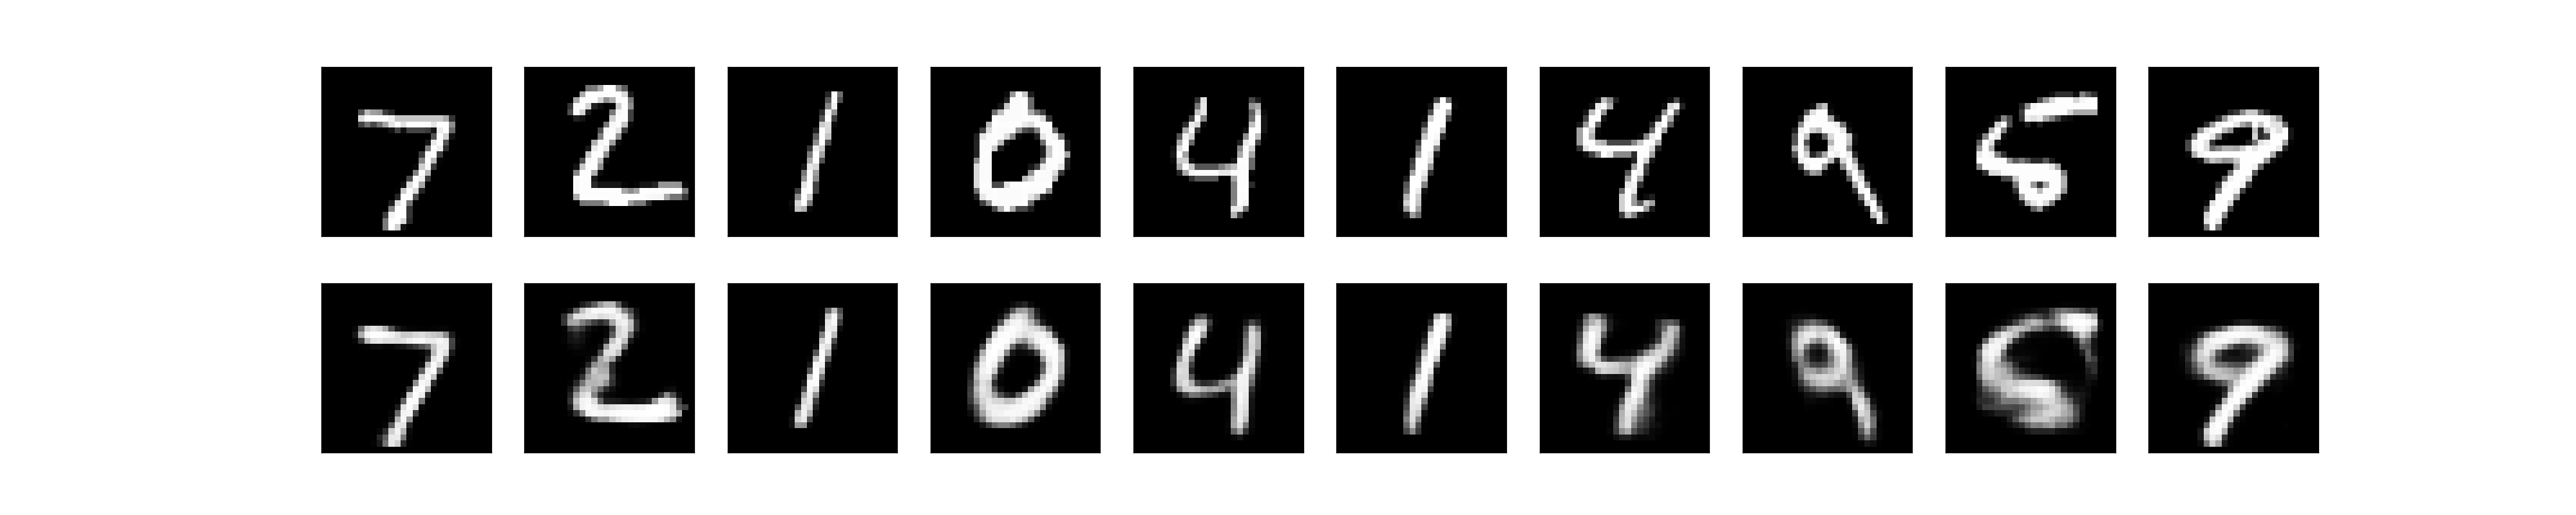

In [7]:
# encode and decode some digits
# note that we take them from the *test* set
z = encoder.predict(x_test,  batch_size=10)
y = decoder.predict(z)


# use Matplotlib (don't ask)
import matplotlib.pyplot as plt

n = 10  # how many digits we will display
plt.figure(figsize=(20, 4))
for i in range(n):
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(x_test[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(y[i].reshape(28, 28))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()